TP Noté : Détection de défaut des cartes de crédit
=============



Introduction au sujet
-----

Voici le lien pour un descriptif complet des données [Lien données](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#). 

* NB : Il faut rendre un jupyter notebook avec votre nom et prénom avant 13H15. A envoyer à :
houssam.akhmouch@unicaen.fr

* Pour les justifications, il faut répondre avec du texte dans des cellules dédiées ou, à minima, les écrire en tant que commentaire.

* Bon courage!


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import *
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier

On lit les données

In [3]:
df = pd.read_excel('credit_card.xls',  skiprows=[0])

**1) Afficher les 5 premières lignes du DataFrame**

In [4]:
df[:5]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**2) Afficher leType de chaque colonne**

In [5]:
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

**3) Supprimer la première colonne du DataFrame. Pourquoi on fait ça ? 
Afficher les 5 premières lignes pour vérifier que vous avez bien exécuté votre opération**

In [6]:
df = df.drop(df.columns[0], axis=1)

In [7]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


**4) Afficher la taille du DataFrame (Nombre de ligne,Nombre de colonne)**

In [8]:
df.shape

(30000, 24)

**5) Stocker la dernière colonne dans une variable y. Puis supprimer la du DataFrame. Pourquoi on fait ça?**

In [9]:
y = df.iloc[:,-1]
df = df.drop(df.columns[-1],axis=1)

In [10]:
print("On stock la liste des personnes qui seront en default de payement au prochain mois.")

On stock la liste des personnes qui seront en default de payement au prochain mois.


**7) Exécuter, puis expliquer tous les paramètres de la fonction suivante:**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)
# le X_train sont les données d'entrée qui serviront à entrainer notre réseau/classifieur
# le y_train sont les données de sortie qui serviront à l'entrainement. Par rapport aux valeurs d'entrées, la sortie attendue
# le x_test sont les données d'entrée qui nous servirons à tester notre réseau/classifieur. le classieur/réseau nous retournera donc des valeurs qui devront se rapprocher au maximum des valeurs du y_test(valeur à prédire)


**8) Afficher les tailles de X_train, X_test, y_train, y_test. Est ce que les tailles affichées sont logiques? Pourquoi?**

In [12]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)
# Oui les tailles affichées sont logiques car notre réseau aura autant de donnée d'entrée que de sortie à l'entrainement ou lors du test. D'où le 20100 et le 9900
# Et il aura 23 données d'entrée et une de sortie. Pour le train et le test il y a le meme nombre d'entrée car le réseau/classifieur calcul les poids de probabilité à partir de ces valeurs


(20100, 23)
(20100,)
(9900, 23)
(9900,)


**9) A quoi sert ce Split?**

**10) Commencez par apprendre un SVM linéaire sur vos données d'apprentissage.**

In [13]:
#Ce split permet d'avoir 2/3 des données pour l'entrainement et 1/3 des données pour tester la fiabilité de notre réseau/classifieur
# Cela permet de ne pas tester sur les données qui ont servis à l'entrainement afin de voir si le réseau/classifieur trouve une relation sans biais.
svc = svm.SVC(gamma='scale').fit(X_train,y_train)
y_pred = svc.predict(X_test)

**11) Afficher la matrice de confusion sur l'échantion Test. Qu'en pensez vous?**

In [14]:
conf_mat = confusion_matrix(y_test, y_pred)
#0,0 -> TrueNegative
#1,0 -> FalseNegative
#1,1 -> TruePositive
#0,1 -> FalsePositive
print("Matrice de confusion:\n", conf_mat)
accuracy = (conf_mat[0][0] + conf_mat[0][1]) / (conf_mat[0][0] + conf_mat[1][0] + conf_mat[0][1] + conf_mat[1][1])
precision = conf_mat[1][1] / (conf_mat[1][1] + conf_mat[0][1])
recall = conf_mat[1][1] / (conf_mat[1][1] + conf_mat[1][0])

print("Accuracy score : ", accuracy_score(y_test, y_pred))
print("Precision score : ", average_precision_score(y_test, y_pred))
print("recall score : ", recall_score(y_test, y_pred))

print("Accuracy score : ", accuracy)
print("Precision score : ", precision)
print("recall score : ", recall)

Matrice de confusion:
 [[7742    0]
 [2158    0]]
Accuracy score :  0.7820202020202021
Precision score :  0.21797979797979797
recall score :  0.0
Accuracy score :  0.7820202020202021
Precision score :  nan
recall score :  0.0


c:\python\python3.7\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  


**12) Calculez manuellement l'accuracy, le recall et la précision
Vous devez d'abord donner une définition précise de tous ces termes et expliquer la différence entre l'accuracy et la précision.**


l'accuracy est le taux de bonne classification ou l’exactitude. -> taux de vrai positif + taux de vrai

la précision donne le pourcentage de bonne réponse. -> taux de vrai positif /(taux vrai positif + taux de faux positif)

le recall, permet de calculer la proportion de résultats positifs réels identifiée correctement -> le taux de vrai positif /(taux de vrai positif + taux de faux negatifs)

L'accuracy et la précision sont deux différents aspects liés à l'obtention d'une mesure correcte. L'accuracy est liée à la proximité de la valeur réelle d'une mesure particulière (ou d'un ensemble de mesures). La précision est le degré de résolution d'une différence et la répétabilité d'une mesure.

**13) Interpréter les résultats, à votre avis C'est quoi le problème?**

Ici le probleme c'est qu'on a que des vrais positifs ou que des faux négatifs. Donc notre classifieur ne trouve rien


**14) On va maintenant réintegrer le Y dans X_train , Expliquer le code suivant :**

In [15]:
#On remet à notre X_train la column des impayés au prochain mois avec comme identifiant de column "y"
X_train['y']=y_train
#On separe notre X_train en deux dous X_train, un pour ceux qui ne seront pas en impayés, et un ou ils seront en impayés
X_train_1,X_train_0=X_train[X_train.y==1],X_train[X_train.y==0]
#reinitialise les index des X_train et remet celui par défault de pandas
X_train_1=X_train_1.reset_index(drop=True)
X_train_0=X_train_0.reset_index(drop=True)

c:\python\python3.7\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**15) Afficher les tailles de X_train_1, X_train_0 , Qu'en pensez vous?**

In [16]:
print("X_train_1 :",X_train_1.shape )
print("X_train_0 :",X_train_0.shape)
# Il y a un probleme de taille entre le nombre de personne qui seront en impayés au mois prochaine, 4478 seront en impayés contre 15 622 qui ne le seront pas. Il y a donc un probleme de taille


X_train_1 : (4478, 24)
X_train_0 : (15622, 24)


**16) Construire un DataFrame X_train_new qui contient autant de 1 que de 0 , puis mélanger les données (shuffle).**

* Ps: Il y a une fonction qui s'appelle append qui permet de concatener verticalement deux DataFrames

In [17]:
X_train_0_new = X_train_0[:X_train_1.shape[0]]
X_train_new = X_train_1.append(X_train_0_new)
X_train_new = shuffle(X_train_new)
X_train_new

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,y
2669,260000,2,3,1,54,-1,-1,-2,-2,-2,...,15809,3756,9560,5484,2504,16593,3764,11092,963,0
3536,80000,1,1,1,39,0,0,0,2,0,...,41462,36589,39985,5000,5169,21,3000,4000,57,0
4239,50000,1,3,1,26,1,2,2,0,0,...,13596,13861,14255,1600,0,2000,2000,2000,2000,1
3485,20000,2,2,1,46,2,0,0,2,2,...,19259,20139,19434,1289,2859,0,1044,0,528,1
1152,100000,2,1,1,52,2,2,2,2,2,...,44183,47211,46401,3000,3000,0,4000,0,3000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,210000,1,2,1,37,1,-1,-1,-1,-1,...,325,325,325,650,325,325,325,325,325,1
3608,300000,2,1,2,24,0,0,0,0,0,...,35906,38963,40283,1518,1507,5406,3963,2283,900,0
2926,20000,1,2,2,24,2,3,2,2,3,...,20394,19228,19615,0,0,2616,0,1400,0,0
2462,70000,1,2,2,28,1,2,2,2,2,...,28738,27977,30022,1600,1000,2000,0,2500,0,1


**17) Réentrainer le modèle SVM sur X_train_new**

In [18]:
y_train_new = X_train_new.iloc[:,-1]
X_train_new = X_train_new.drop(df.columns[-1],axis=1)
svc = svm.SVC(gamma='scale').fit(X_train_new, y_train_new)

In [19]:
y_pred = svc.predict(X_test)

**18) Afficher la matrice de confusion, et les métriques : Accuracy, Précision, Recall, F1score**

In [20]:
conf_mat = confusion_matrix(y_test, y_pred)
print("Matrice de confusion:\n", conf_mat)
print(conf_mat[0,0],"-> TrueNegative")
print(conf_mat[1,0],"-> FalseNegative")
print(conf_mat[1,1],"-> TruePositive")
print(conf_mat[0,1],"-> FalsePositive")


Matrice de confusion:
 [[4168 3574]
 [ 692 1466]]
4168 -> TrueNegative
692 -> FalseNegative
1466 -> TruePositive
3574 -> FalsePositive


In [21]:
print("Accuracy score : ", accuracy_score(y_test, y_pred))
print("Precision score : ", average_precision_score(y_test, y_pred))
print("recall score : ", recall_score(y_test, y_pred))
print("F1 score : ", f1_score(y_test, y_pred))

Accuracy score :  0.5690909090909091
Precision score :  0.2674985456310758
recall score :  0.6793327154772938
F1 score :  0.4073353709363713


**19) C'est un peu mieux non? Qu'en pensez vous?**
Oui c'est un peu mieux mais ca manque encore de precision


**20) Afficher la courbe ROC Puis commenter le résultat.**

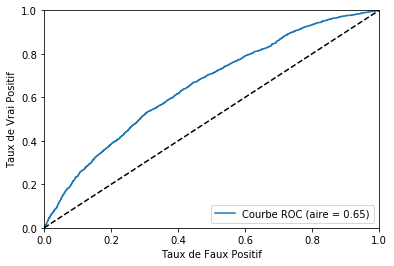

ROC auc (roc_curve et auc) 0.6548467981178934
ROC auc (  roc_auc_score ) 0.6548467981178934


In [22]:
score_pred = svc.decision_function(X_test)

fpr,tpr,thresholds = roc_curve(y_test,score_pred)
roc_auc = auc(fpr,tpr)
plt.clf()
plt.plot(fpr, tpr, label='Courbe ROC (aire = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taux de Faux Positif')
plt.ylabel('Taux de Vrai Positif')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print('ROC auc (roc_curve et auc)',roc_auc)
print('ROC auc (  roc_auc_score )',roc_auc_score(y_test, score_pred))
#Plus notre courbe se rapproche du coin supérieur gauche plus on est précis. Ici on est pas mal mais on peut faire mieux

On va maintenant s'attaquer à une autre technique.

**21) Expliquer le code suivant: Que fait-il ? Pourquoi la boucle s'arrête à 3?**

In [23]:
# Cette fonction permet de construire un DataFrame Xnew qui contiendra autant de 1 que de 0 de notre X_train

def merge_2DF(Xtrain1,Xtrain0):
    Xnew=Xtrain1.append(Xtrain0[0:len(Xtrain1)])
    return Xnew
# Etant donnée qu'on va devoir entrainer 3 SVM cela permet de separer en trois jeu de données 
# On aura ainsi 3 jeu de données de X qui contiendront autant de 0 que de 1 mais contrairement à la question précédente on aura tout les 0( c'est à dire pour chaque jeu de données on aura tout les 0 et des 1 differents)
results_train=[]
for i in range(3):
    results_train.append(merge_2DF(X_train_1,X_train_0[i*4478:(i+1)*4478]))

* Comme dans le code précédent, la figure ci-dessous explique la nouvelle stratégie. Nous allons constuire X0,X1,X2, chaqe X va contenir tous les 1 de X train, puis on va diviser le X_train_0
en 3 parties et on injecte chaque partie dans un X différent.
--> On va ainsi construire 3 échantillons de X qui sont complètement balancés (contiennent autant de 1 que de 0) mais on voit tous les 0 contrairement à la méthode précédente.



* Le code précdent va donc nous constuire une liste qui contient 3 DataFrames (X0,X1 et X2). Attention le Y est inclus dans les X donc pensez à le faire sortir lors de votre entrainement

![title](photo_TP.PNG)

**22) Entrainer 3 modèles de SVM différents sur 3 DataFrames comme expliqué dans l'image ci dessus**

In [24]:
X0 = results_train[0].drop(df.columns[-1],axis=1)
Y0 = results_train[0].iloc[:,-1]

X1 = results_train[1].drop(df.columns[-1],axis=1)
Y1 = results_train[1].iloc[:,-1]

X2 = results_train[2].drop(df.columns[-1],axis=1)
Y2 = results_train[2].iloc[:,-1]


In [ ]:
svc0 = svm.SVC(gamma='scale').fit(X0, Y0)
svc1 = svm.SVC(gamma='scale').fit(X1, Y1)
svc2 = svm.SVC(gamma='scale').fit(X2, Y2)

In [ ]:
print("X0 shape : ", X0.shape)
print("Y0 shape : ", Y0.shape)

print("X1 shape : ", X1.shape)
print("Y1 shape : ", Y1.shape)

print("X2 shape : ", X2.shape)
print("Y2 shape : ", Y2.shape)

**23) Prédire sur X_test avec les 3 modèles prédictions**

In [ ]:
y_pred0 = svc0.predict(X_test)
y_pred1 = svc1.predict(X_test)
y_pred2 = svc2.predict(X_test)

* On fait une moyenne des 3 prédictions pour avoir la prédiction finale Puis, on utilise un système de vote, pour avoir une prédiction à 1 il faut que les 3 modèles soit d'accord

In [ ]:
y_pred=np.mean([y_pred0,y_pred1,y_pred2], axis=0)
y_pred=[int(x) for x in y_pred]

**24) Calculez les métriques accuracy, précision,recall et F1 score. Interpréter les résultats , Tester avec d'autre méthode de vote, choix d'un seuil fixe, etc .. Qu'est ce que cela change?**

In [ ]:
print("Accuracy score : ", accuracy_score(y_test, y_pred))
print("Precision score : ", average_precision_score(y_test, y_pred))
print("F1 score : ", f1_score(y_test, y_pred))
print("recall score : ", recall_score(y_test, y_pred))
#Notre classifieur ne se trompe que 4/10 

**24) Calculer les scores des prédiction des 3 modèles , puis calculer un vecteur score de prédiction moyen comme pour la question précédente**

In [ ]:
score_pred0 = svc0.decision_function(X_test)
score_pred1 = svc1.decision_function(X_test)
score_pred2 = svc2.decision_function(X_test)

In [ ]:
score_pred_final=np.mean([score_pred0,score_pred1,score_pred2], axis=0)

**25) Tracer la courbe ROC, Que constatez-vous?**

In [ ]:
score_pred = score_pred_final
fpr,tpr,thresholds = roc_curve(y_test,score_pred)
roc_auc = auc(fpr,tpr)
plt.clf()
plt.plot(fpr, tpr, label='Courbe ROC (aire = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taux de Faux Positif')
plt.ylabel('Taux de Vrai Positif')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print('ROC auc (roc_curve et auc)',roc_auc)
print('ROC auc (  roc_auc_score )',roc_auc_score(y_test, score_pred))


* On va maintenant entrainer un Random Forest sur le X_train_new et y_new 

In [ ]:
clf = RandomForestClassifier(max_depth=100, random_state=0)
clf.fit(X_train_new, y_train_new)
y_pred = clf.predict(X_test)

**26) Afficher l'accuracy, précision recall et le F1Score**

In [ ]:
print("Accuracy score : ", accuracy_score(y_test, y_pred))
print("Precision score : ", average_precision_score(y_test, y_pred))
print("F1 score : ", f1_score(y_test, y_pred))
print("recall score : ", recall_score(y_test, y_pred))

**27) Tracer la courbe ROC Pour ce Modèle**

**28) Trouver le seuil qui Maximise le F1 score sur l'échantillon Test
puis afficher toutes les métriques classiques sur le même échantilon**

**29) A quoi nous servirait un échantillon de validation?**


**30) Bonus : Faire un Grid Search sur le Random Forest avec des paramètres qui vous semblent raisonnables pour maximiser le F1 Score**